In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata = pd.read_csv(city_data_to_load)
ridedata = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(citydata, ridedata, on='city')

# Display the data table for preview
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
avgfares = pd.DataFrame(df.groupby(['city'])['fare'].mean())
avgfares = avgfares.rename(index=str, columns={"fare": "avg_fare"})
avgfares.head()

,avg_fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [3]:
ridecount = pd.DataFrame(ridedata['city'].value_counts())
ridecount.head()

,city
West Angela,39
South Karenland,38
North Jason,35
Liumouth,33
Port Frank,33


In [4]:
ridecount = pd.DataFrame(df['city'].value_counts().reset_index())
ridecount.columns = ['city', 'ride_count']
ridecount.head()

,city,ride_count
0,West Angela,39
1,South Karenland,38
2,North Jason,35
3,Liumouth,33
4,Port Frank,33


In [5]:
combined = pd.merge(avgfares, ridecount, on='city')
combined.head()

,city,avg_fare,ride_count
0,Amandaburgh,24.641667,18
1,Barajasview,25.332273,22
2,Barronchester,36.422500,16
3,Bethanyland,32.956111,18
4,Bradshawfurt,40.064000,10


In [6]:
combinedfull = pd.merge(citydata, combined, on='city')
combinedfull.head()

,city,driver_count,type,avg_fare,ride_count
0,Richardfort,38,Urban,22.373214,28
1,Williamsstad,59,Urban,24.362174,23
2,Port Angela,67,Urban,23.836842,19
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,25.123871,31


In [7]:
urban = combinedfull.loc[combinedfull['type'] == 'Urban']
suburban = combinedfull.loc[combinedfull['type'] == 'Suburban']
rural = combinedfull.loc[combinedfull['type'] == 'Rural']

## Bubble Plot of Ride Sharing Data

Text(42, 35, 'Note:\nCircle size correlates with driver count per city.')

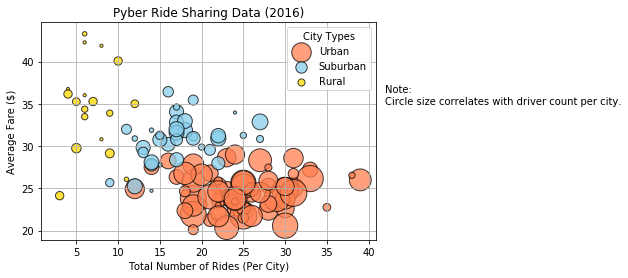

In [8]:
# Obtain the x and y coordinates for each of the three city types
x_urban = urban['ride_count']
y_urban = urban['avg_fare']
urban_size = urban['driver_count']

x_suburban = suburban['ride_count']
y_suburban = suburban['avg_fare']
suburban_size = suburban['driver_count']

x_rural = rural['ride_count']
y_rural = rural['avg_fare']
rural_size = rural['driver_count']

# Build the scatter plots for each city types
urban_plot = plt.scatter(x_urban, y_urban, marker="o", facecolors="coral", edgecolors="black",
            s=(urban_size*10), alpha=0.75, label="Urban")

suburban_plot = plt.scatter(x_suburban, y_suburban, marker="o", facecolors="skyblue", edgecolors="black",
            s=(suburban_size*10), alpha=0.75, label="Suburban")

rural_plot = plt.scatter(x_rural, y_rural, marker="o", facecolors="gold", edgecolors="black",
            s=(rural_size*10), alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')

# Create a legend
plt.legend(handles=[urban_plot, suburban_plot, rural_plot], loc="best", title="City Types",)

# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city.', fontsize=10)

## Total Fares by City Type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


Text(0.5, 1.0, '% of Total Fares by City Type')

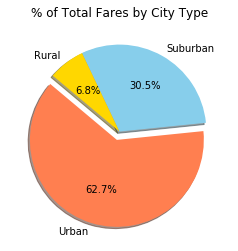

In [9]:
# Calculate Type Percents
faretotals = df.groupby('type').sum()
print(faretotals['fare'])

# Build Pie Chart
citylist = ['Urban', 'Suburban', 'Rural']
farelist = [39854.38, 19356.33, 4327.93]
explode = [0.1, 0, 0]
colors = ['coral', 'skyblue', 'gold']

plt.pie(farelist, explode=explode, labels=citylist, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')

## Total Rides by City Type

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64


Text(0.5, 1.0, '% of Total Rides by City Type')

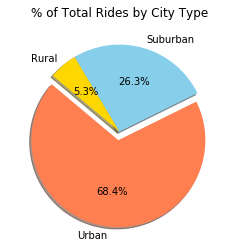

In [10]:
# Calculate Ride Percents
ridetotals = df['type'].value_counts()
print(ridetotals)

# Build Pie Chart
citylist = ['Urban', 'Suburban', 'Rural']
ridelist = [1625, 625, 125]
explode = [0.1, 0, 0]
colors = ['coral', 'skyblue', 'gold']

plt.pie(ridelist, explode=explode, labels=citylist, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Rides by City Type')

## Total Drivers by City Type

          driver_count
type                  
Rural               78
Suburban           490
Urban             2405


Text(0.5, 1.0, '% of Total Drivers by City Type')

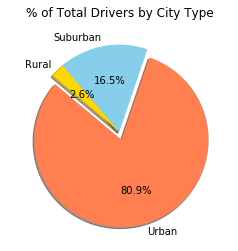

In [11]:
# Calculate Driver Percents
drivertotals = citydata.groupby('type').sum()
print(drivertotals)
# Build Pie Charts
citylist = ['Urban', 'Suburban', 'Rural']
driverlist = [2405, 490, 78]
explode = [0.1, 0, 0]
colors = ['coral', 'skyblue', 'gold']

plt.pie(driverlist, explode=explode, labels=citylist, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('% of Total Drivers by City Type')